In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from astropy.time import Time 
namelist = ['2003MA3','2010CO1','2010DG77','2010EX11','2010FC81','2010FH81','2010GS7','2010JN71','2010KX7','2010PW58','2010XP69','2019DD2']


  0%|          | 0/8 [00:00<?, ?it/s]/tmp/ipykernel_2820199/1123199596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tdbjd'][i] = t.tdb.jd
/tmp/ipykernel_2820199/1123199596.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tdbmjd'][i] = t.tdb.mjd
100%|██████████| 23/23 [00:00<00:00, 1042.04it/s]


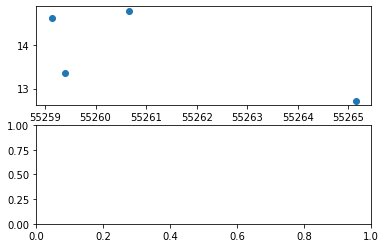

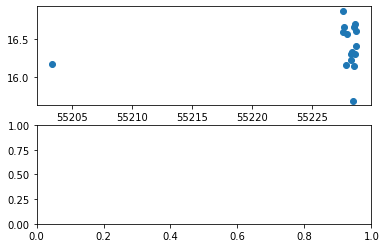

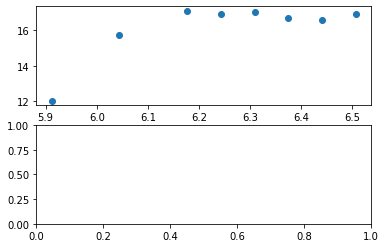

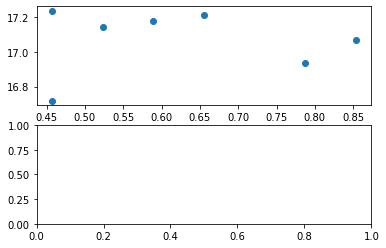

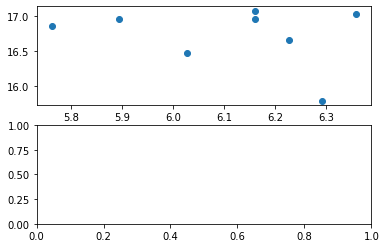

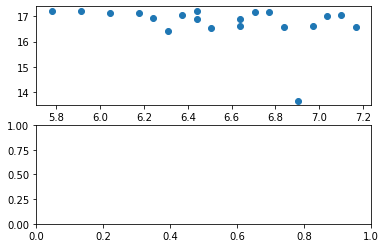

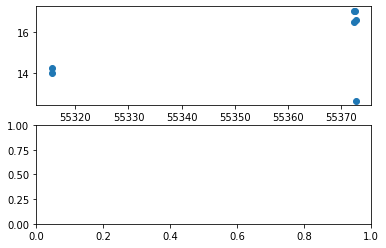

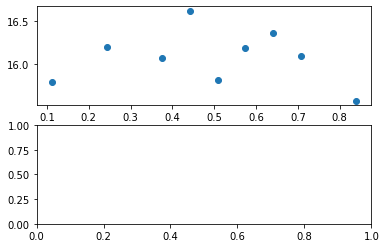

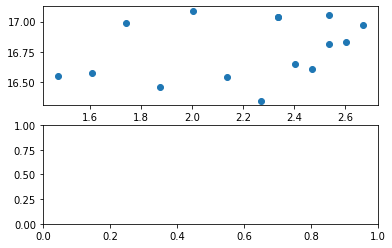

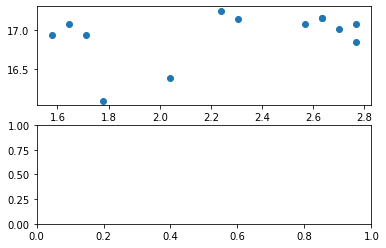

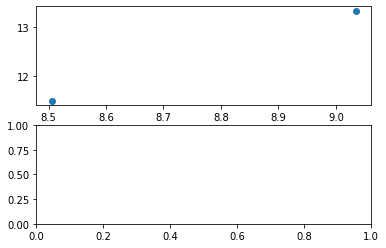

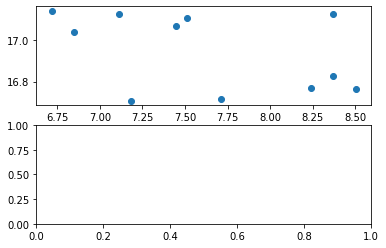

In [9]:
#nlist = ['1994cb','1996gq','2002lt24', '2008np3', '2009ux17' ,'2010aj30', '2010bh115' ,'2010ca55' ,'2010cc55' ,'2010cn141','2010dh77' ,'2010fa81' ,'2010gp67' ,'2010hw81' ,'2010hx107', '2010hz104' ,'2010jx16', '2010kp10' ,'2010ku7' ,'2010lh14' ,'2010lj68' ,'2010lk68' ,'2010ll68' ,'2010lv108' ,'2010ns36', '2010ny65', '2010oh126', '2010pu66' ,'2014fd7' ,'2015tf' ,'2016uh101']
for i in range(len(namelist)):
    name = namelist[i].lower()
    rawdata = pd.read_csv(f'{name}.csv')
    data = rawdata.loc[:,['mjd','w1mpro','w2mpro','w3mpro','w4mpro','ph_qual','sso_flg']]
    data.insert(loc=len(data.columns),column='tdbjd',value='no')
    data.insert(loc=len(data.columns),column='tdbmjd',value='no')
    #data['mjd'] = 2400000.5+data['mjd']
    for i in tqdm(range(len(data))):  
        t = Time(data['mjd'][i],format='mjd',scale='utc')
        t.format = 'iso'
        data['tdbjd'][i] = t.tdb.jd
        data['tdbmjd'][i] = t.tdb.mjd
    #data.to_csv(f'{name}.txt',sep='\t',index=False)
    t = np.array(data['tdbmjd'])
    x = np.array(data['w1mpro'])
    lt = len(t)
    lt = lt//2
    plt.figure()
    plt.subplot(2,1,1)
    plt.scatter(t[:lt],x[:lt])
    plt.subplot(2,1,2)
    plt.scatter(t[lt:],x[lt:])
    plt.xlabel(f'{name.upper()} tdb_mjd')
    plt.ylabel('w1')
    plt.savefig(name+'.png')
    plt.cla()